## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.408439 -0.265949  0.266651 -0.502948 -0.904566 -1.553954
1  1.558321  0.745713  0.730510  0.111104 -0.923201  0.444978
2 -0.578661 -1.206356 -1.007440  0.131334  0.714960 -0.498992
3 -1.036450  0.680343 -0.811712 -1.081397 -0.863590 -1.201582
4 -0.037720 -1.526668 -1.131268  1.092871 -0.272174 -0.297765


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0291166	total: 56.8ms	remaining: 56.7s
1:	learn: 1.0169332	total: 57.3ms	remaining: 28.6s
2:	learn: 1.0045100	total: 57.9ms	remaining: 19.2s
3:	learn: 0.9926981	total: 58.4ms	remaining: 14.5s
4:	learn: 0.9812954	total: 59ms	remaining: 11.7s
5:	learn: 0.9713835	total: 59.5ms	remaining: 9.86s
6:	learn: 0.9597549	total: 60.1ms	remaining: 8.52s
7:	learn: 0.9493991	total: 60.6ms	remaining: 7.51s
8:	learn: 0.9405225	total: 61.1ms	remaining: 6.73s
9:	learn: 0.9306155	total: 61.6ms	remaining: 6.1s
10:	learn: 0.9208389	total: 62.2ms	remaining: 5.6s
11:	learn: 0.9103438	total: 62.8ms	remaining: 5.17s
12:	learn: 0.8992610	total: 63.4ms	remaining: 4.81s
13:	learn: 0.8890053	total: 63.9ms	remaining: 4.5s
14:	learn: 0.8812965	total: 64.3ms	remaining: 4.22s
15:	learn: 0.8716538	total: 64.8ms	remaining: 3.98s
16:	learn: 0.8620370	total: 65.3ms	remaining: 3.77s
17:	learn: 0.8515756	total: 65.9ms	remaining: 3.59s
18:	learn: 0.8429226	total: 66.4ms	remaining: 3.4

107:	learn: 0.3513418	total: 107ms	remaining: 888ms
108:	learn: 0.3486770	total: 108ms	remaining: 883ms
109:	learn: 0.3451743	total: 108ms	remaining: 877ms
110:	learn: 0.3416721	total: 109ms	remaining: 872ms
111:	learn: 0.3387522	total: 109ms	remaining: 866ms
112:	learn: 0.3357753	total: 110ms	remaining: 861ms
113:	learn: 0.3332257	total: 110ms	remaining: 856ms
114:	learn: 0.3305493	total: 111ms	remaining: 851ms
115:	learn: 0.3270675	total: 111ms	remaining: 846ms
116:	learn: 0.3239281	total: 112ms	remaining: 842ms
117:	learn: 0.3212233	total: 112ms	remaining: 837ms
118:	learn: 0.3190760	total: 112ms	remaining: 832ms
119:	learn: 0.3161343	total: 113ms	remaining: 827ms
120:	learn: 0.3137038	total: 113ms	remaining: 822ms
121:	learn: 0.3109090	total: 114ms	remaining: 818ms
122:	learn: 0.3084845	total: 114ms	remaining: 813ms
123:	learn: 0.3062981	total: 114ms	remaining: 808ms
124:	learn: 0.3031999	total: 115ms	remaining: 804ms
125:	learn: 0.3002341	total: 115ms	remaining: 801ms
126:	learn: 

268:	learn: 0.1034538	total: 187ms	remaining: 508ms
269:	learn: 0.1027953	total: 188ms	remaining: 507ms
270:	learn: 0.1022204	total: 188ms	remaining: 506ms
271:	learn: 0.1015551	total: 189ms	remaining: 505ms
272:	learn: 0.1009992	total: 189ms	remaining: 503ms
273:	learn: 0.1004549	total: 190ms	remaining: 502ms
274:	learn: 0.0996173	total: 190ms	remaining: 501ms
275:	learn: 0.0990731	total: 190ms	remaining: 499ms
276:	learn: 0.0984876	total: 191ms	remaining: 498ms
277:	learn: 0.0980441	total: 191ms	remaining: 497ms
278:	learn: 0.0975158	total: 192ms	remaining: 495ms
279:	learn: 0.0969267	total: 192ms	remaining: 494ms
280:	learn: 0.0963887	total: 193ms	remaining: 493ms
281:	learn: 0.0955992	total: 193ms	remaining: 491ms
282:	learn: 0.0948701	total: 193ms	remaining: 490ms
283:	learn: 0.0944098	total: 194ms	remaining: 489ms
284:	learn: 0.0937990	total: 194ms	remaining: 488ms
285:	learn: 0.0932920	total: 195ms	remaining: 486ms
286:	learn: 0.0927980	total: 195ms	remaining: 485ms
287:	learn: 

502:	learn: 0.0330677	total: 291ms	remaining: 288ms
503:	learn: 0.0329308	total: 292ms	remaining: 287ms
504:	learn: 0.0327849	total: 292ms	remaining: 286ms
505:	learn: 0.0326050	total: 293ms	remaining: 286ms
506:	learn: 0.0324572	total: 293ms	remaining: 285ms
507:	learn: 0.0323159	total: 294ms	remaining: 285ms
508:	learn: 0.0321729	total: 294ms	remaining: 284ms
509:	learn: 0.0320364	total: 295ms	remaining: 283ms
510:	learn: 0.0318978	total: 295ms	remaining: 282ms
511:	learn: 0.0318040	total: 296ms	remaining: 282ms
512:	learn: 0.0317133	total: 296ms	remaining: 281ms
513:	learn: 0.0316254	total: 296ms	remaining: 280ms
514:	learn: 0.0316022	total: 297ms	remaining: 279ms
515:	learn: 0.0313798	total: 297ms	remaining: 279ms
516:	learn: 0.0312956	total: 298ms	remaining: 278ms
517:	learn: 0.0312732	total: 298ms	remaining: 277ms
518:	learn: 0.0310566	total: 298ms	remaining: 277ms
519:	learn: 0.0309357	total: 299ms	remaining: 276ms
520:	learn: 0.0309138	total: 299ms	remaining: 275ms
521:	learn: 

670:	learn: 0.0170375	total: 370ms	remaining: 181ms
671:	learn: 0.0169862	total: 370ms	remaining: 181ms
672:	learn: 0.0169356	total: 371ms	remaining: 180ms
673:	learn: 0.0168529	total: 371ms	remaining: 180ms
674:	learn: 0.0168034	total: 372ms	remaining: 179ms
675:	learn: 0.0167412	total: 372ms	remaining: 178ms
676:	learn: 0.0166503	total: 373ms	remaining: 178ms
677:	learn: 0.0165821	total: 373ms	remaining: 177ms
678:	learn: 0.0165639	total: 374ms	remaining: 177ms
679:	learn: 0.0164849	total: 374ms	remaining: 176ms
680:	learn: 0.0163974	total: 375ms	remaining: 175ms
681:	learn: 0.0163310	total: 375ms	remaining: 175ms
682:	learn: 0.0163132	total: 375ms	remaining: 174ms
683:	learn: 0.0162616	total: 376ms	remaining: 174ms
684:	learn: 0.0161823	total: 376ms	remaining: 173ms
685:	learn: 0.0161126	total: 377ms	remaining: 172ms
686:	learn: 0.0160623	total: 377ms	remaining: 172ms
687:	learn: 0.0160126	total: 378ms	remaining: 171ms
688:	learn: 0.0159975	total: 378ms	remaining: 171ms
689:	learn: 

897:	learn: 0.0092369	total: 475ms	remaining: 53.9ms
898:	learn: 0.0092088	total: 475ms	remaining: 53.4ms
899:	learn: 0.0092043	total: 476ms	remaining: 52.9ms
900:	learn: 0.0091999	total: 476ms	remaining: 52.3ms
901:	learn: 0.0091604	total: 477ms	remaining: 51.8ms
902:	learn: 0.0091560	total: 477ms	remaining: 51.2ms
903:	learn: 0.0091258	total: 478ms	remaining: 50.7ms
904:	learn: 0.0090825	total: 478ms	remaining: 50.2ms
905:	learn: 0.0090716	total: 479ms	remaining: 49.7ms
906:	learn: 0.0090344	total: 479ms	remaining: 49.1ms
907:	learn: 0.0090143	total: 480ms	remaining: 48.6ms
908:	learn: 0.0089963	total: 480ms	remaining: 48.1ms
909:	learn: 0.0089921	total: 481ms	remaining: 47.5ms
910:	learn: 0.0089546	total: 481ms	remaining: 47ms
911:	learn: 0.0089322	total: 482ms	remaining: 46.5ms
912:	learn: 0.0089280	total: 482ms	remaining: 45.9ms
913:	learn: 0.0088995	total: 483ms	remaining: 45.4ms
914:	learn: 0.0088584	total: 483ms	remaining: 44.9ms
915:	learn: 0.0088391	total: 484ms	remaining: 44

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

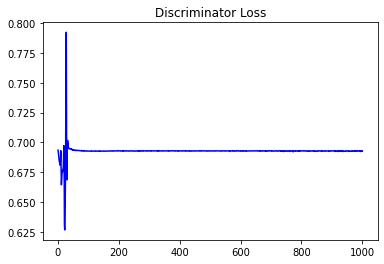

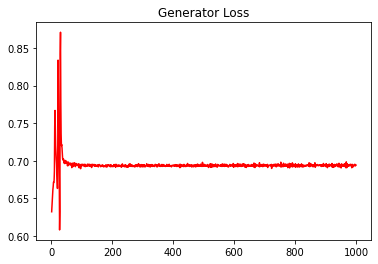

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.052151971297985746


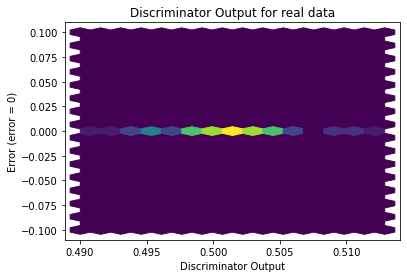

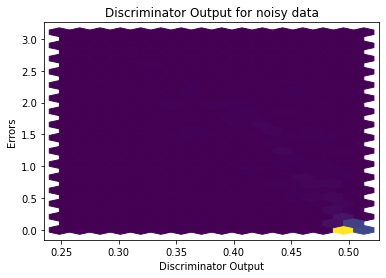

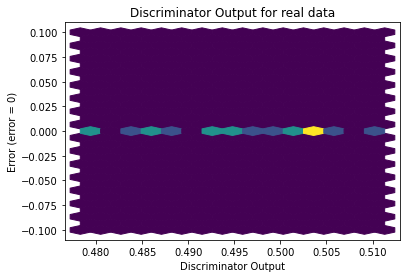

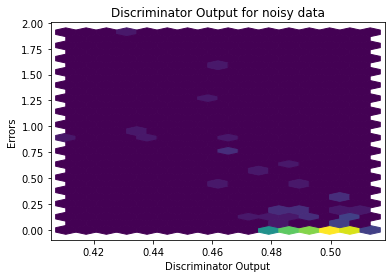

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


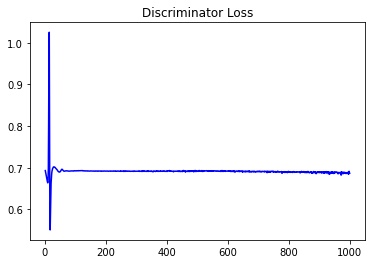

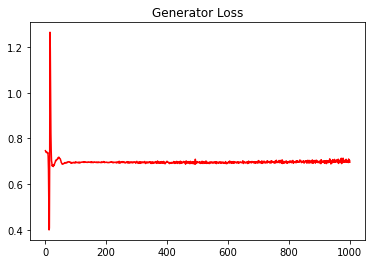

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.059548614905365664


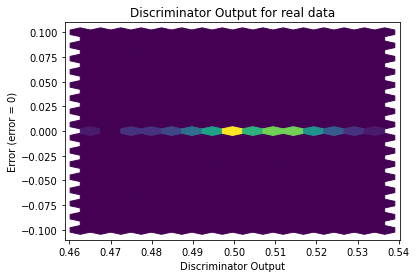

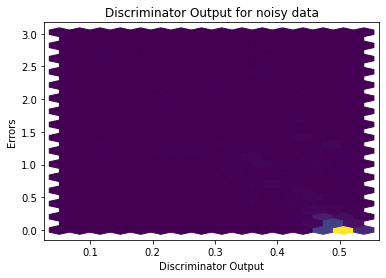

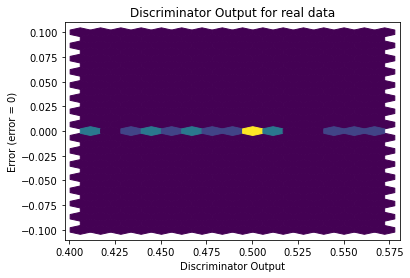

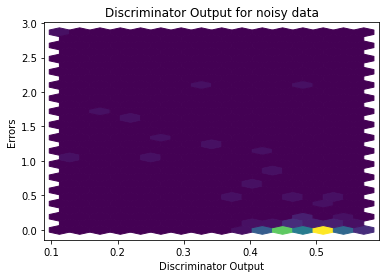

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0697]], requires_grad=True)
